In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
from scipy.spatial import distance as dist
from scipy import sparse
from scipy.spatial import cKDTree as KDTree
import numba, argparse, gzip, pickle, os
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import pandas as pd

In [2]:
folder_tabs = '../../data/kSZ_tables/'

In [3]:
def ReadTab(fname_tab, zmin=0.2, zmax=1., Mmin=1e14, Mmax=3e14, nobj=1000):
    tab = pd.read_pickle(fname_tab)
    tab = tab[(tab.M200 > Mmin) & (tab.M200 < Mmax)]    
    tab = tab[(tab.Z > zmin) & (tab.Z < zmax)]
    tab = tab.sample(nobj)
    
    return tab

In [4]:
zmin = 0.1
zmax = 0.8
Mmin = 1e14
Mmax = 3e14

In [5]:
fname_kSZ_AVG              = os.path.join(folder_tabs, 'T_kSZ_Flender_fwhm1.2arcmin_footprintSPT-SZ_theta2.0arcmin_AVG.pkl.gz')
fname_kSZ_AP               = os.path.join(folder_tabs, 'T_kSZ_Flender_fwhm1.2arcmin_footprintSPT-SZ_theta2.0arcmin_AP.pkl.gz')
fname_kSZ_tSZ_AP           = os.path.join(folder_tabs, 'T_kSZ_tSZ_Flender_fwhm1.2arcmin_footprintSPT-SZ_theta2.0arcmin_AP.pkl.gz')
fname_kSZ_tSZ_CMB_AP       = os.path.join(folder_tabs, 'T_kSZ_tSZ_Flender_CMB_fwhm1.2arcmin_footprintSPT-SZ_theta2.0arcmin_AP.pkl.gz')
fname_kSZ_tSZ_CMB_noise_AP = os.path.join(folder_tabs, 'T_kSZ_tSZ_Flender_CMB_noise18muK_fwhm1.2arcmin_footprintSPT-SZ_theta2.0arcmin_AP.pkl.gz')


In [6]:
tab_kSZ_AVG              = ReadTab(fname_kSZ_AVG             , zmin=zmin, zmax=zmax, Mmin=Mmin, Mmax=Mmax)
tab_kSZ_AP               = ReadTab(fname_kSZ_AP              , zmin=zmin, zmax=zmax, Mmin=Mmin, Mmax=Mmax)
tab_kSZ_tSZ_AP           = ReadTab(fname_kSZ_tSZ_AP          , zmin=zmin, zmax=zmax, Mmin=Mmin, Mmax=Mmax)
tab_kSZ_tSZ_CMB_AP       = ReadTab(fname_kSZ_tSZ_CMB_AP      , zmin=zmin, zmax=zmax, Mmin=Mmin, Mmax=Mmax)
tab_kSZ_tSZ_CMB_noise_AP = ReadTab(fname_kSZ_tSZ_CMB_noise_AP, zmin=zmin, zmax=zmax, Mmin=Mmin, Mmax=Mmax)

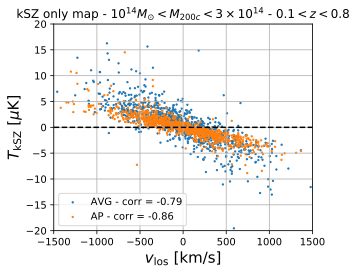

In [9]:
plt.figure(figsize=(5,4))
plt.scatter(tab_kSZ_AVG.VLOS, tab_kSZ_AVG.TKSZ, s=2, label='AVG - corr = %.2f'%tab_kSZ_AVG['TKSZ'].corr(tab_kSZ_AVG['VLOS']))
plt.scatter(tab_kSZ_AP.VLOS,  tab_kSZ_AP.TKSZ,  s=2, label='AP - corr = %.2f'%tab_kSZ_AP['TKSZ'].corr(tab_kSZ_AP['VLOS']))
plt.axhline(ls='--',c='k')
plt.grid()
plt.legend()
plt.xlabel(r'$v_{\rm los}$ [km/s]',size=15)
plt.ylabel(r'$T_{\rm kSZ}$ $[\mu$K]',size=15)
plt.title(r'kSZ only map - $10^{14}M_{\odot} < M_{200c} < 3 \times 10^{14}$ - $0.1 < z < 0.8 $')
plt.tight_layout()
plt.ylim(-20,20)
plt.xlim(-1500,1500)
plt.savefig('/Users/fbianchini/Research/kSZ/plots/T_kSZ_vs_v_los_kSZ_only_map_2.0arcmin_SPTSZ_footprint.pdf')

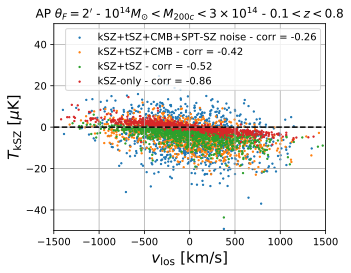

In [10]:
plt.figure(figsize=(5,4))
plt.scatter(tab_kSZ_tSZ_CMB_noise_AP.VLOS,  tab_kSZ_tSZ_CMB_noise_AP.TKSZ,  s=2, label='kSZ+tSZ+CMB+SPT-SZ noise - corr = %.2f'%tab_kSZ_tSZ_CMB_noise_AP['TKSZ'].corr(tab_kSZ_tSZ_CMB_noise_AP['VLOS']))
plt.scatter(tab_kSZ_tSZ_CMB_AP.VLOS,  tab_kSZ_tSZ_CMB_AP.TKSZ,  s=2, label='kSZ+tSZ+CMB - corr = %.2f'%tab_kSZ_tSZ_CMB_AP['TKSZ'].corr(tab_kSZ_tSZ_CMB_AP['VLOS']))
plt.scatter(tab_kSZ_tSZ_AP.VLOS,  tab_kSZ_tSZ_AP.TKSZ,  s=2, label='kSZ+tSZ - corr = %.2f'%tab_kSZ_tSZ_AP['TKSZ'].corr(tab_kSZ_tSZ_AP['VLOS']))
plt.scatter(tab_kSZ_AP.VLOS,  tab_kSZ_AP.TKSZ,  s=2, label='kSZ-only - corr = %.2f'%tab_kSZ_AP['TKSZ'].corr(tab_kSZ_AP['VLOS']))
plt.axhline(ls='--',c='k')
plt.grid()
plt.legend()
plt.xlabel(r'$v_{\rm los}$ [km/s]',size=15)
plt.ylabel(r'$T_{\rm kSZ}$ $[\mu$K]',size=15)
plt.title(r'AP $\theta_F=2^{\prime}$ - $10^{14}M_{\odot} < M_{200c} < 3 \times 10^{14}$ - $0.1 < z < 0.8 $')
plt.tight_layout()
plt.ylim(-50,50)
plt.xlim(-1500,1500)
plt.savefig('/Users/fbianchini/Research/kSZ/plots/T_kSZ_vs_v_los_kSZ_only_map_2.0arcmin_SPTSZ_footprint_many_comps.pdf')

In [39]:
tab_kSZ_tSZ_CMB_noise_AP.M200.max()

2.9900522e+14

In [8]:
fname_kSZ_tSZ_CMB_SPTpolnoise_AP = os.path.join(folder_tabs, 'T_kSZ_tSZ_Flender_CMB_noise5muK_fwhm1.2arcmin_footprintSPTpol_theta2.0arcmin_AP.pkl.gz')
tab_kSZ_tSZ_CMB_SPTpolnoise_AP = ReadTab(fname_kSZ_tSZ_CMB_SPTpolnoise_AP             , zmin=zmin, zmax=zmax, Mmin=Mmin, Mmax=Mmax)


In [12]:
fname_kSZ_tSZ_CMB_SPTSZ_SPTpolnoise_AP = os.path.join(folder_tabs, 'T_kSZ_tSZ_Flender_CMB_noise18muK_noise5muK_fwhm1.2arcmin_footprintSPT-SZ_Soergel_footprint2SPTpol_theta2.0arcmin_AP.pkl.gz')
tab_kSZ_tSZ_CMB_SPTSZ_SPTpolnoise_AP = ReadTab(fname_kSZ_tSZ_CMB_SPTSZ_SPTpolnoise_AP             , zmin=zmin, zmax=zmax, Mmin=Mmin, Mmax=Mmax)


In [17]:
tab_kSZ_tSZ_CMB_SPTpolnoise_AP.M200.

1.0003137e+14

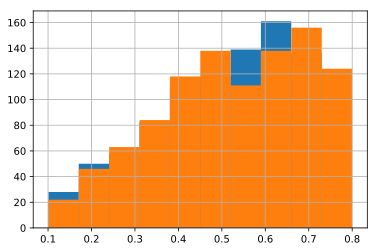

In [21]:
tab_kSZ_tSZ_CMB_SPTSZ_SPTpolnoise_AP.Z.hist()
tab_kSZ_tSZ_CMB_SPTpolnoise_AP.Z.hist()